In [25]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from tdfs.routines import tdfs_routine
from rho_rand.routines import rho_rand_routine
from mega.routines import mega_routine
from musical_chairs.routines import mc_routine

In [26]:
#  UNIVERSE PARAMETERS
n_users = 6
n_arms = 9
t_horizon = 3000
arm_means = [0.1, 0.2, 0.3, 0.5, 0.45, 0.6, 0.8, 0.85, 0.9]
best_arms_mean = np.sort(arm_means)[-n_users:]

# MEGA PARAMETERS
mega_params = {
    'c': 0.1,
    'd': 0.05,
    'alpha': 0.5,
    'beta': 0.8,
    'persistence_proba_init': 0.6
}

# MUSICAL CHAIRS PARAMETERS
musical_c_params = {
    't0': 100,
    't1': 200
}

# MONTE-CARLO PARAMETERS
mc_horizon = 10

# Head to head comparison of algs
This next run is designed just to show the results we obtain with TDFS

In [28]:
rewards = np.zeros((8, t_horizon))
for t in range(mc_horizon):
    rewards[0] += tdfs_routine(n_users, n_arms, t_horizon, arm_means, alg='ucb')[:, 0]

for t in range(mc_horizon):
    rewards[1] += rho_rand_routine(n_users, n_arms, t_horizon, arm_means)[:, 0]

for t in range(mc_horizon):
    rewards[2] += mega_routine(n_users, mega_params, n_arms, t_horizon, arm_means, alg='eps')[0].sum(axis=0)
    
for t in range(mc_horizon):
    rewards[3] += mega_routine(n_users, mega_params, n_arms, t_horizon, arm_means, alg='ucb')[0].sum(axis=0)
    
for t in range(mc_horizon):
    rewards[4] += tdfs_routine(n_users, n_arms, t_horizon, arm_means, alg='ts')[:, 0]
    
for t in range(mc_horizon):
    rewards[5] += mega_routine(n_users, mega_params, n_arms, t_horizon, arm_means, alg='ts')[0].sum(axis=0)
    
for t in range(mc_horizon):
    rewards[6] += rho_rand_routine(n_users, n_arms, t_horizon, arm_means, alg='ts')[:, 0]

for t in range(mc_horizon):
    rewards[7] += mc_routine(n_users, musical_c_params, n_arms, t_horizon, arm_means)[:, 0]
    
rewards /= mc_horizon

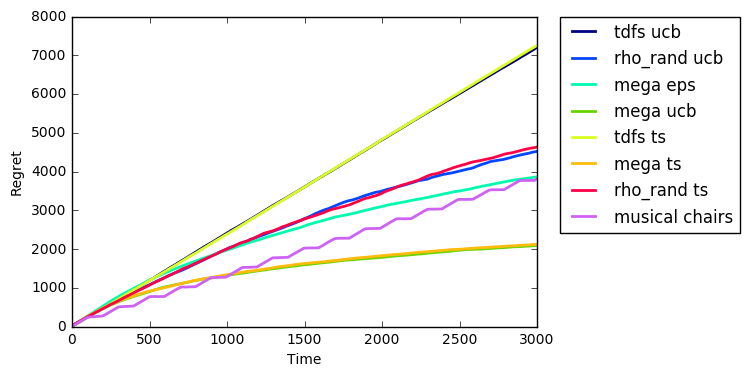

In [31]:
plt.ylabel("Regret")
plt.xlabel("Time")
cmap = plt.get_cmap("gist_ncar")
label = ["tdfs ucb", "rho_rand ucb", "mega eps", "mega ucb", "tdfs ts","mega ts", "rho_rand ts",  "musical chairs"]
regret = np.cumsum(best_arms_mean.sum() - rewards, axis=1)

for i in range(len(label)):
    
    plt.plot(regret[i], linewidth=2, color=cmap(float(i)/ len(label)), label=label[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [18]:
best_arms_mean.sum()

4.0999999999999996